### Cvičení z Matematické Statistiky 6, Václav Kalous

In [1]:
set.seed(399)

Nejprve si zkusím shlukovou analýzu podle instrukcí na webu.

In [2]:
install.packages(pkgs="http://www.karlin.mff.cuni.cz/~hlavka/sms2/SMSdata_1.0.tar.gz", repos=NULL, type="source") 

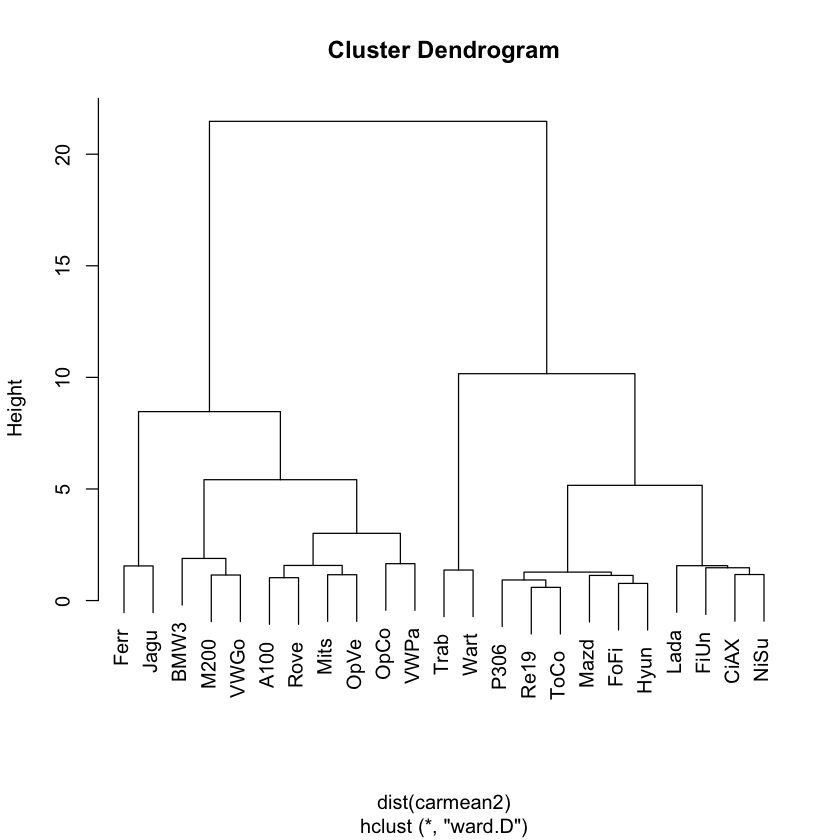

In [3]:
library(SMSdata)
data(carmean2)
plot(hclust(dist(carmean2),"ward.D"))

In [4]:
shluky=cutree(hclust(dist(carmean2),"ward.D"),k=2)

In [5]:
?carmean2

In [6]:
sapply(carmean2, tapply, shluky, function(x) round(mean(x),1))

,Economy,Service,Value,Price,Design,Sporty,Safety,Easy
1,3.8,2.4,2.3,4.2,2.6,2.9,2.5,2.8
2,2.8,3.6,4.0,2.4,3.7,4.0,4.0,2.8


Vidíme,  že pro první shluk je vetšina hodnot nižší, hodnocení ceny je však horší (vyšší). Shlukovou analýzou jsme tedy data patrně rozdělili na drahá a kvalitní auta a na ty levnější a míň kvalitní (to je patrné i z grafu, kde je na jedné straně Ferrari a Jaguár a na druhé Trabant a Lada)

**Úkol**

Jako data si opět vezmu výživové údaje cereálií.

In [101]:
cer = read.csv("cereal.csv", sep = ";", header = TRUE, row.names = 1)
cer = cer[5:(ncol(cer)-5)][2:nrow(cer),]
cer = cer[c(1,3,4,5)]

In [117]:
head(cer)

,fat,fiber,carbo,sugars
,<int>,<dbl>,<dbl>,<int>
100% Natural Bran,5,2.0,8.0,8
All-Bran,1,9.0,7.0,5
All-Bran with Extra Fiber,0,14.0,8.0,0
Almond Delight,2,1.0,14.0,8
Apple Cinnamon Cheerios,2,1.5,10.5,10
Apple Jacks,0,1.0,11.0,14


Nejprve zkusím provést shlukovou analýzu podobně jako v příkladu nahoře.

In [103]:
cer_clust = hclust(dist(cer), "ward.D")

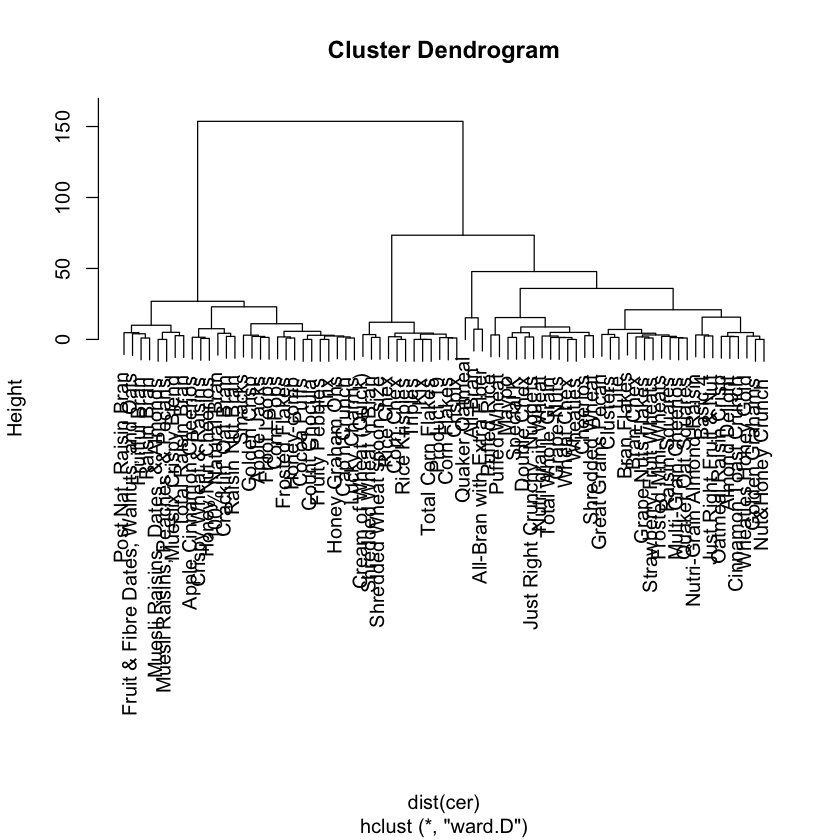

In [104]:
plot(cer_clust)

Podle dendrogramu to vypadá, že máme čtyří hlavní shluky.

In [108]:
cer_cut = cutree(cer_clust,k = 4)

In [109]:
cer_sh = sapply(cer, tapply, cer_cut, function(x) round(mean(x),1))
cer_sh

,fat,fiber,carbo,sugars
1,1.4,1.9,12.3,11.6
2,1.0,8.6,4.7,1.3
3,1.0,2.0,15.4,5.2
4,0.2,0.9,21.0,2.1


Na základě průměrných hodnot jednotlivých shluků lze říci následující: 

- první shluk obsahuje produkty s vyšším obsahem cukru a tuku
- druhý obsahuje produkty s vysokým obsahem vlákniny a nízkým obsahem sacharidů a cukru (pravděpodobně půjde o ty zdravější produkty)
- třetí shluk významněji nevybočuje, má druhý nejvyšší obsah sacharidů a cukru
- čtvrtý shluk má nízké hodnoty (nejméně tuku a vlákniny), ale nejvyšší obsah sacharidů


Zkusím se nyní podívat i na metodu k-means.

In [95]:
?kmeans

In [114]:
km = kmeans(x = cer,centers = 4)

Podíváme se na souřadnice centroidů:

In [116]:
round(km$centers,1)

,fat,fiber,carbo,sugars
1,1.2,1.6,12.9,11.7
2,1.0,8.6,4.7,1.3
3,0.6,1.6,19.1,3.1
4,1.3,2.4,13.1,5.7


Pro centra shluků k-means lze říci:

- první shluk: nejvíce cukru, málo vlákniny
- druhý shluk: nejvíce vlákniny, nejméně cukru a sacharidů (opět zdravé produkty)
- třetí shluk: nejméně tuku, nejvíce sacharidů
- čtvrtý shluk: nejvíce tuku

Vypadá to, že výsledky obou metod jsou podobné (s nějakými rozdíly), pouze jsme zde prohodili třetí a čtvrtý shluk oproti předchozí metodě.